Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1240 - val_loss: 0.1140
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms

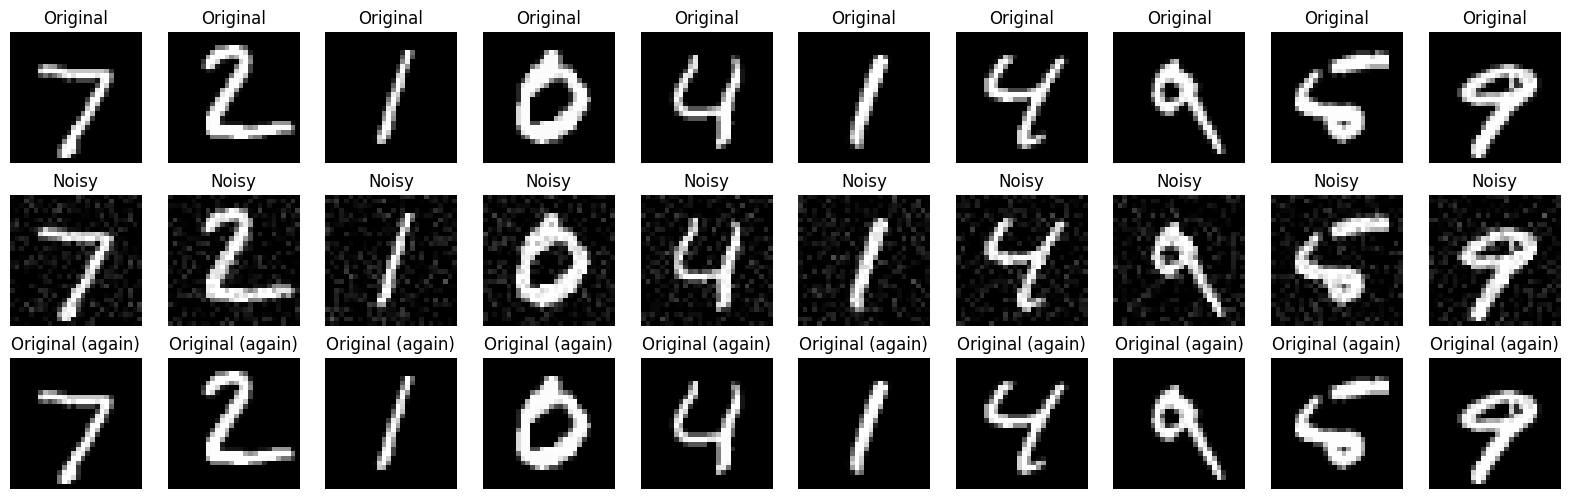

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist

# Function to add Gaussian noise with a reduced sigma
def add_gaussian_noise(images, mean=0.0, sigma=0.1):
    noisy = images + np.random.normal(mean, sigma, images.shape)
    # Clip values to keep images in [0,1]
    return np.clip(noisy, 0., 1.)

# Function to compute PSNR (Peak Signal-to-Noise Ratio)
def compute_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return 100  # Perfect match
    return 20 * np.log10(1.0 / np.sqrt(mse))

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.  # Normalize to [0,1]
x_test  = x_test.astype("float32") / 255.

# Expand dimensions to add channel axis (grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# Add Gaussian noise with sigma=0.1 (lower noise level)
x_train_noisy = add_gaussian_noise(x_train, sigma=0.1)
x_test_noisy  = add_gaussian_noise(x_test, sigma=0.1)

# Build the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoder: two Conv2D + MaxPooling blocks
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder: two Conv2D + UpSampling blocks; using sigmoid to match [0,1] target
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer=optimizers.Adam(), loss=losses.MeanSquaredError())

print(autoencoder.summary())

# Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,               # Increased epochs for better convergence
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Reconstruct images from the test set (not used in display below)
decoded_imgs = autoencoder.predict(x_test_noisy)
test_psnr = compute_psnr(x_test, decoded_imgs)
print("Test PSNR: {:.2f} dB".format(test_psnr))

# Plot original, noisy, and original again (instead of reconstructed)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Original image again (instead of reconstructed)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original (again)")
    plt.axis("off")
plt.show()


In [3]:
import time
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 100)
y_test  = to_categorical(y_test, 100)

# ---------------------------
# VGG16-based Model
# ---------------------------
# We use the pretrained VGG16 model; since CIFAR-100 images are 32x32, we need to adjust.
# One common approach is to upsample the images to 48x48 or 64x64. Here we upsample to 48x48.
import cv2

def resize_images(images, size=(48, 48)):
    resized = np.array([cv2.resize(img, size) for img in images])
    return resized

x_train_vgg = resize_images(x_train, size=(48, 48))
x_test_vgg  = resize_images(x_test, size=(48, 48))

# Create VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# Freeze the base model
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers on top
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

# Train VGG16-based model
vgg_history = vgg_model.fit(x_train_vgg, y_train,
                            epochs=10,
                            batch_size=64,
                            validation_split=0.2)

# Evaluate VGG16-based model
vgg_eval = vgg_model.evaluate(x_test_vgg, y_test)
print(f"VGG16 Model - Loss: {vgg_eval[0]:.4f}, Accuracy: {vgg_eval[1]:.4f}")

# Measure inference time for VGG16-based model
start_time = time.time()
vgg_preds = vgg_model.predict(x_test_vgg)
vgg_inference_time = time.time() - start_time
print(f"VGG16 Inference Time for {len(x_test_vgg)} images: {vgg_inference_time:.2f} seconds")

# ---------------------------
# AlexNet-inspired Model
# ---------------------------
alexnet = Sequential([
    Conv2D(96, kernel_size=3, strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet.summary()

# Train AlexNet-inspired model
alexnet_history = alexnet.fit(x_train, y_train,
                              epochs=10,
                              batch_size=64,
                              validation_split=0.2)

# Evaluate AlexNet-inspired model
alexnet_eval = alexnet.evaluate(x_test, y_test)
print(f"AlexNet-inspired Model - Loss: {alexnet_eval[0]:.4f}, Accuracy: {alexnet_eval[1]:.4f}")

# Measure inference time for AlexNet-inspired model
start_time = time.time()
alexnet_preds = alexnet.predict(x_test)
alexnet_inference_time = time.time() - start_time
print(f"AlexNet-inspired Inference Time for {len(x_test)} images: {alexnet_inference_time:.2f} seconds")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,871,716 (56.73 MB)

 Trainable params: 157,028 (613.39 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.0894 - loss: 4.1226 - val_accuracy: 0.2644 - val_loss: 3.1083
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.2269 - loss: 3.1887 - val_accuracy: 0.3014 - val_loss: 2.8604
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2744 - loss: 2.9369 - val_accuracy: 0.3143 - val_loss: 2.7604
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2943 - loss: 2.8204 - val_accuracy: 0.3310 - val_loss: 2.7044
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3078 - loss: 2.7454 - val_accuracy: 0.3331 - val_loss: 2.6537
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.3184 - loss: 2.6745 - val_accuracy: 0.3463 - val_loss: 2.6128
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3326 - loss: 2.6329 - val_accuracy: 0.3518 - val_loss: 2.5917
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3430 - loss: 2.5863 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         409,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,294,052 (142.27 MB)

 Trainable params: 37,294,052 (142.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.0086 - loss: 4.6084 - val_accuracy: 0.0083 - val_loss: 4.6060
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.0092 - loss: 4.6053 - val_accuracy: 0.0086 - val_loss: 4.6066
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.0097 - loss: 4.6052 - val_accuracy: 0.0077 - val_loss: 4.6072
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.0095 - loss: 4.6053 - val_accuracy: 0.0077 - val_loss: 4.6075
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.0099 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6077
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.0093 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6077
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.0105 - loss: 4.6053 - val_accuracy: 0.0077 - val_loss: 4.6079
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.0107 - loss: 4.6052 - 